## Load Data with Sanity Checks of Dataframe Columns

In [1]:
from CastleDefense.utils.visualizeFieldUtils import *
from CastleDefense.utils.extractPlayDataUtils import *
import matplotlib.pyplot as plt
from IPython.display import Video, display

gameId, playId, week = 2022090800, 343, 1
load_play_data(gameId, playId, week)

# SANITY CHECKS

play_df = load_play_data(56)
print("Length Of play_df: ", len(play_df))

timesteps = len(play_df) / 23  # 22 players plus 1 football
print("Number of timesteps: ", timesteps)

num_of_frames = play_df['frameId'].unique().shape[0]   # Number of unique frames
max_frame_id = play_df['frameId'].max()  

print("Number of frames: ", num_of_frames)
print("Max frameId: ", max_frame_id)

play_df['time'] = pd.to_datetime(play_df['time'])
time_of_play = play_df['time'].max() - play_df['time'].min()
print("Time of play: ", time_of_play)

Length Of play_df:  506
Number of timesteps:  22.0
Number of frames:  22
Max frameId:  22
Time of play:  0 days 00:00:02.099999


In [2]:
play_df.head()  # Show first 6 rows

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN


## Create Football Field Visualization

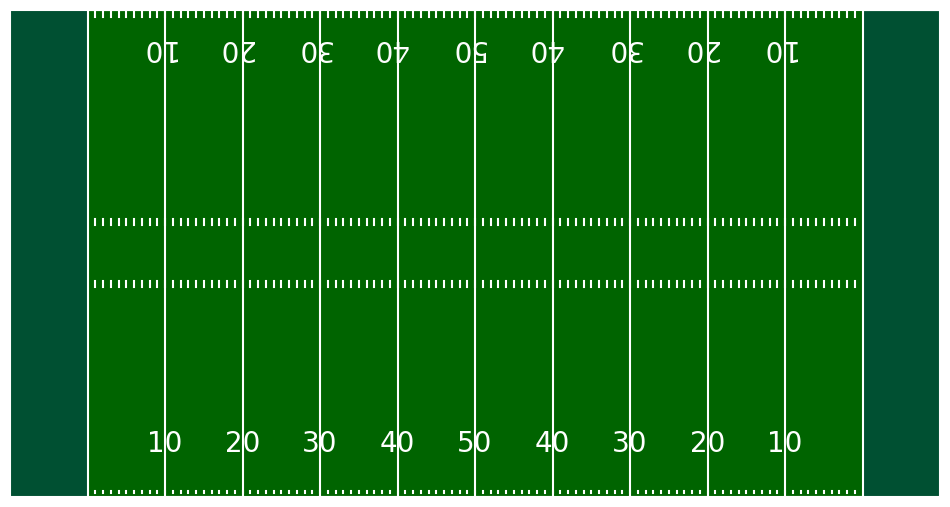

In [3]:
plt.close()
fig, ax = create_football_field()
plt.show()

## Show Tracking Data at Events

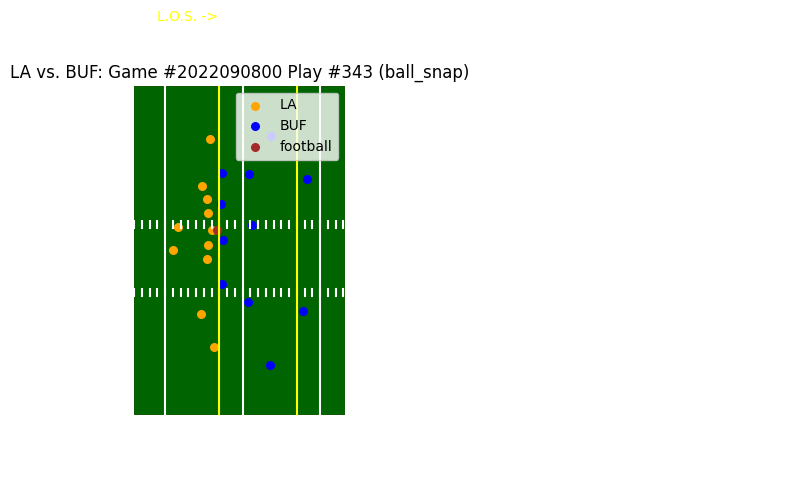

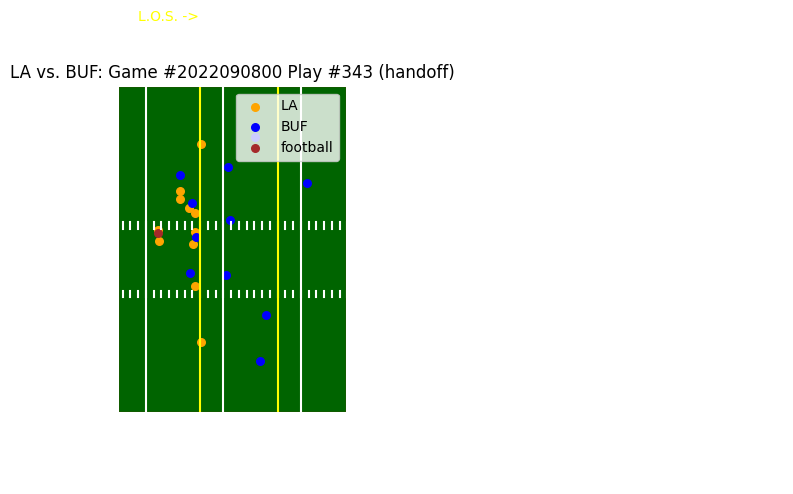

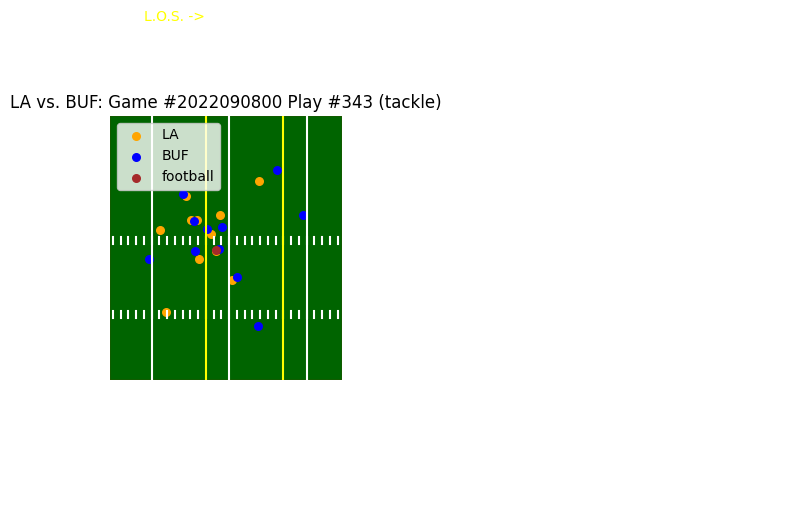

In [4]:
plot_play_events(playId, gameId, week) 

## Show Movement from Player Tracking Data

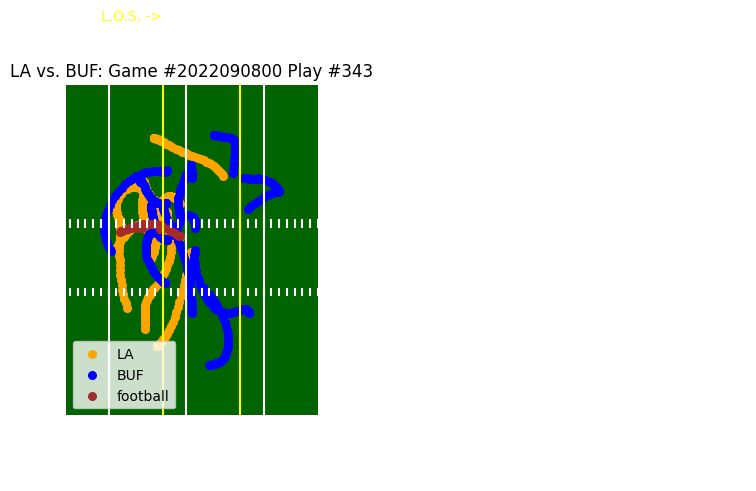

In [5]:
plot_play_tracked_movements(playId, gameId, week)

## Create and Save tracking data Animation from play


/home/paul/castle-defense-repo/CastleDefense/output/animation_20231113_1617.mp4


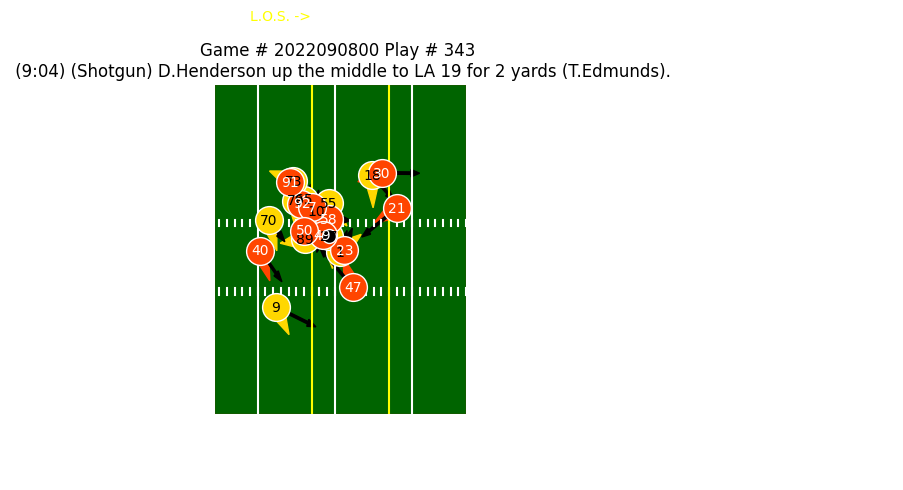

In [6]:
import time
plt.close()
anim = animate_player_movement(gameId=gameId, playId=playId, weekNumber=week)
animation_name = 'animation_' + time.strftime("%Y%m%d_%H%M") + '.mp4'
animation_path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), '..', 'output')), animation_name)
print(animation_path)
save_animation(anim, animation_path)

plt.show()

In [ ]:
Video(animation_path, embed=True)
## This works if you open the notebook in browser